In [1]:
# DataFrame
import pandas as pd

# Scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.metrics import mean_absolute_error,mean_squared_error

# Matplot
import matplotlib.pyplot as plt

# Utility
import numpy as np

In [2]:
#Importing Datasets
data = pd.read_csv('Datasets/cleaned_data.csv')
data = data.drop(['Unnamed: 0'], axis = 1)
data.head(5)

,album_name,release_date,artist_name,explicit,song_name,lyrics,language,album_total_tracks,duration_ms,popularity,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,artist_songs,artist_popularity
0,÷ (Deluxe),2017-03-03,ed sheeran,False,Galway Girl,She played the fiddle in an Irish band\nBut sh...,en,0.168539,0.040946,0.870968,...,1.0,0.171295,0.075069,0.000000,0.332754,0.791490,0.308951,0.75,0.277027,0.845185
1,Camila,2018-01-12,camila cabello,False,Havana (feat. Young Thug),"Hey\nHavana, ooh na-na (ay)\nHalf of my heart ...",en,0.112360,0.093116,0.903226,...,1.0,0.015774,0.187940,0.000039,0.120843,0.381880,0.341004,0.75,0.085135,0.340000
2,Unorthodox Jukebox,2012-12-07,bruno mars,False,When I Was Your Man,"Same bed, but it feels just\nA little bit bigg...",en,0.101124,0.089210,0.935484,...,1.0,0.045545,0.951991,0.000000,0.073028,0.374471,0.136466,0.75,0.139189,0.462222
3,Red (Deluxe Edition),2012-10-22,taylor swift,False,We Are Never Ever Getting Back Together,"I remember when we broke up, the first time\nS...",en,0.235955,0.064576,0.591398,...,1.0,0.152633,0.009767,0.000029,0.088242,0.758679,0.220263,0.75,0.497297,0.537778
4,V,2014-09-02,maroon 5,True,Sugar,"I'm hurting baby, I'm broken down\nI need your...",en,0.123596,0.113528,0.903226,...,1.0,0.023328,0.060360,0.000000,0.071180,0.900508,0.436865,0.75,0.201351,0.473333


## Machine learning model - Random Forest Regression

In [3]:
# making a new dataset with only numerical data
numer_data = data.select_dtypes(include=['float64','int64'])
numer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1266 entries, 0 to 1265
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   album_total_tracks  1266 non-null   float64
 1   duration_ms         1266 non-null   float64
 2   popularity          1266 non-null   float64
 3   danceability        1266 non-null   float64
 4   energy              1266 non-null   float64
 5   key                 1266 non-null   float64
 6   loudness            1266 non-null   float64
 7   mode                1266 non-null   float64
 8   speechiness         1266 non-null   float64
 9   acousticness        1266 non-null   float64
 10  instrumentalness    1266 non-null   float64
 11  liveness            1266 non-null   float64
 12  valence             1266 non-null   float64
 13  tempo               1266 non-null   float64
 14  time_signature      1266 non-null   float64
 15  artist_songs        1266 non-null   float64
 16  artist

In [4]:
# y is popularity, independent variable
# x is dependent variable

y = numer_data["popularity"]
x = numer_data
x.drop("popularity", inplace=True, axis=1)

/Users/pradyumn/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [5]:
# Splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=42)

In [6]:
regressor = RandomForestRegressor(n_estimators = 50) #n_estimators can be up to max 100
regressor.fit(X_train, y_train)

RandomForestRegressor(n_estimators=50)

In [7]:
y_pred = regressor.predict(X_test)

In [8]:
df = pd.DataFrame({'Real Values':y_test, 'Predicted Values':y_pred})
df

,Real Values,Predicted Values
1210,0.301075,0.647312
1039,0.666667,0.520430
422,0.709677,0.618280
1118,0.010753,0.495054
848,0.645161,0.660860
...,...,...
163,0.795699,0.710968
486,0.688172,0.717634
624,0.698925,0.720645
221,0.537634,0.672043


In [9]:
mean_absolute_error(y_test, y_pred)

0.14999745999492

In [10]:
np.sqrt(mean_squared_error(y_test, y_pred))

0.2116023316533383

## CODE FOR RANDOM FOREST VARIABLE IMPORTANCE

Feature: album_total_tracks    Score: 0.0785
Feature: duration_ms           Score: 0.0581
Feature: danceability          Score: 0.0972
Feature: energy                Score: 0.06379
Feature: key                   Score: 0.03645
Feature: loudness              Score: 0.05139
Feature: mode                  Score: 0.00526
Feature: speechiness           Score: 0.10634
Feature: acousticness          Score: 0.07171
Feature: instrumentalness      Score: 0.0484
Feature: liveness              Score: 0.06016
Feature: valence               Score: 0.06731
Feature: tempo                 Score: 0.06971
Feature: time_signature        Score: 0.00574
Feature: artist_songs          Score: 0.07954
Feature: artist_popularity     Score: 0.10038


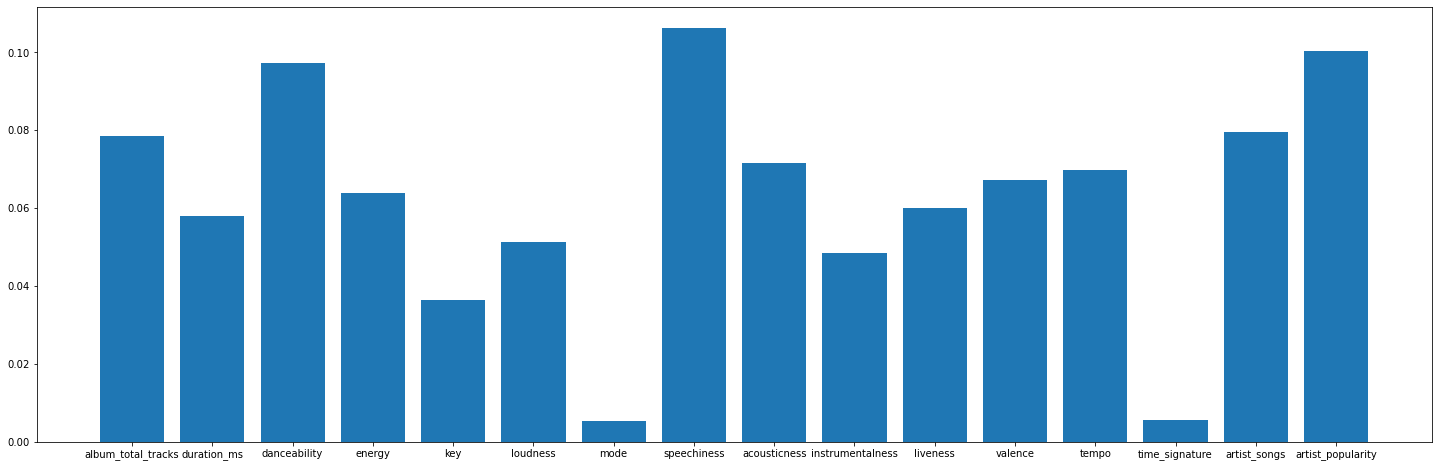

In [11]:
# get importance
importance = regressor.feature_importances_
# summarize feature importance
f = plt.figure(figsize=(25, 8))
feat_score = []

for i,v in enumerate(importance):
    feat_score.append(round(v,5))
y = 0
for x in X_train:
    print(f"{'Feature: '+ x:<30} Score: {feat_score[y]}")
    y+=1    

# plot feature importance
plt.bar([x for x in X_train], importance)
plt.show()
